# Geohackweek participant selection

In [1]:
%matplotlib inline
import os
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import entrofy
import entrofy.mappers
import entrofy.core

import six

seed = 20170615

C:\Users\Anthony Arendt\Anaconda3\lib\site-packages\pandas\core\computation\__init__.py:18: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
C:\Users\Anthony Arendt\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Get credentials
scope = ['https://spreadsheets.google.com/feeds']

credentials = ServiceAccountCredentials.from_json_keyfile_name('Geohackweek2017-adf8548865eb.json', scope)

gc = gspread.authorize(credentials)

In [3]:
# See available sheets
gc.openall()

[<Spreadsheet 'Event Registration (Responses)' id:1mh5I8oIlVCtNB80nIcuwvTJsichHpaB2D_Os-iuCCEo>]

In [4]:
sheets = gc.open_by_key('1mh5I8oIlVCtNB80nIcuwvTJsichHpaB2D_Os-iuCCEo')

In [5]:
ws = sheets.get_worksheet(0)

In [6]:
rec = ws.get_all_records()

In [7]:
df = pd.DataFrame.from_records(rec)

In [8]:
len(df)

92

In [9]:
df.columns

Index(['Do you have any specific project you intend to bring to Geo Hackweek?',
       'Do you have any specific topics you would like to learn about at Geo Hackweek?',
       'Do you have specific datasets that you would like to share at Geo Hackweek to work on with other groups? ',
       'Email Address', 'Experience with geospatial datasets',
       'Familiarity with command line interfaces', 'First Name',
       'Have you applied to Geo Hackweek before and not been selected for participation?',
       'Have you attended any hack day or hack week before?',
       'In terms of gender identity, do you consider yourself a minority with respect to the field of geospatial science?',
       'In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?',
       'Institution or Organization',
       'Is there a topic you could imagine teaching at Geo Hackweek?',
       'Last Name', 'Programming experience',
       'The main reas

In [10]:
new_cols = ['specific_project', 
            'specific_topics', 
            'specific_datasets', 
            'email', 
            'exp_geospatial', 
            'exp_cmd', 
            'first_name', 
            'apply_geohack',
            'apply_hack', 
            'gender_minor', 
            'ethnic_minor',
            'org_institute',
            'teach_topic',
            'last_name',
            'exp_prog',
            'reason_attend',
            'timestamp',
            'person_url',
            'location',
            'position',
            'science_work',
            'need_financial']

In [11]:
df.columns = new_cols

In [12]:
#df = df.drop(['email', 'person_url', 'org_institute', 'first_name', 'last_name', 'reason_attend'], 
#        axis=1)

In [13]:
df.replace('', np.NaN, regex=True, inplace=True)
df.replace('None', np.NaN, regex=True, inplace=True)
df["ethnic_minor"].replace('Yes','True', regex=True, inplace=True)
df["ethnic_minor"].replace('No','False', regex=True, inplace=True)


In [14]:
fixed_categories = ['location', 
                    'position', 
                    'science_work', 
                    'exp_prog', 
                    'exp_geospatial', 
                    'exp_cmd', 
                    'apply_hack', 
                    'apply_geohack', 
                    'need_financial', 
                    'gender_minor', 
                    'ethnic_minor']

In [15]:
def make_plot(column_str):
    ax = entrofy.plotting.plot_distribution(df, column_str,
                                        xtype="categorical",
                                        cmap="YlGnBu", ax=None)
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation='vertical')

### What is your current geographical location?

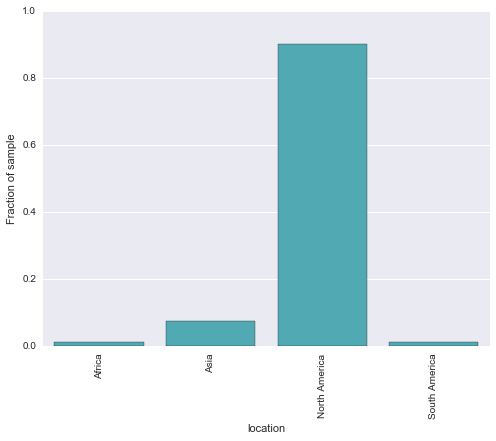

In [16]:
make_plot(fixed_categories[0])

### What is your current position?

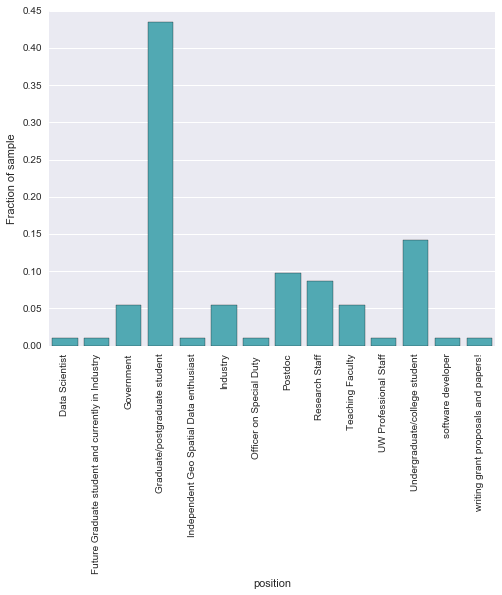

In [17]:
make_plot(fixed_categories[1])

### What is your primary science/work focus?

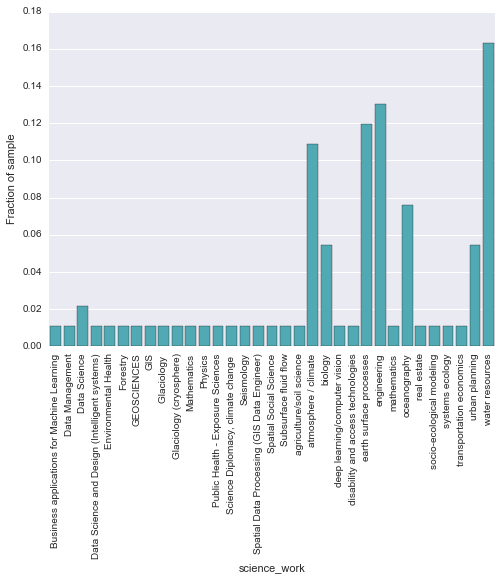

In [18]:
make_plot(fixed_categories[2])

### Programming experience

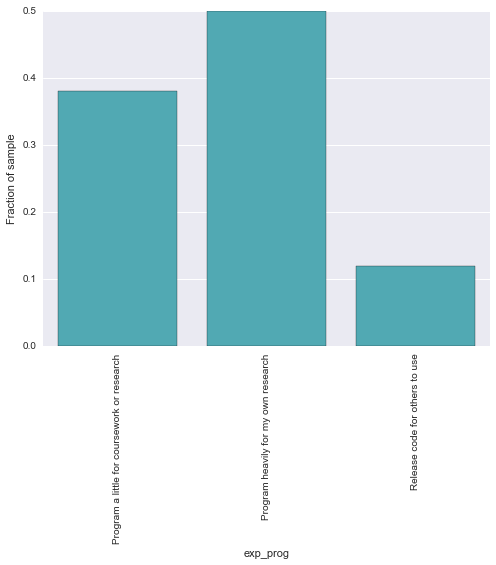

In [19]:
make_plot(fixed_categories[3])

### In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?

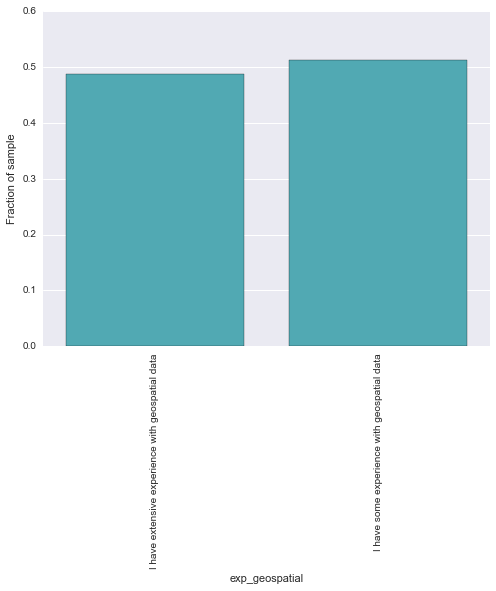

In [20]:
make_plot(fixed_categories[4])

### Familiarity with command line interfaces

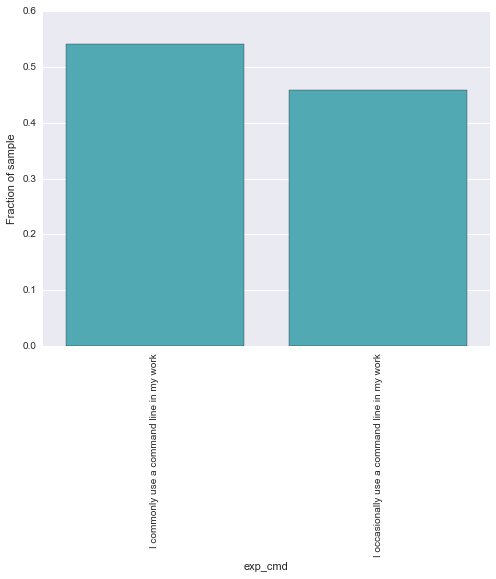

In [21]:
make_plot(fixed_categories[5])

### Have you attended any hack day or hack week before?

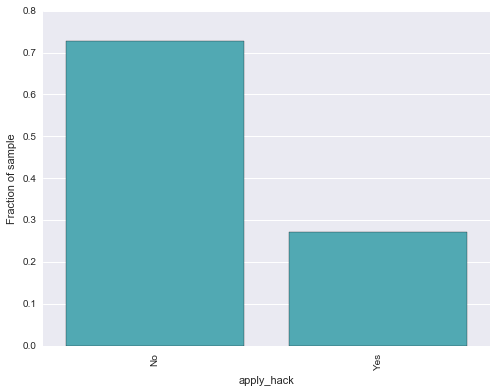

In [22]:
make_plot(fixed_categories[6])

### Have you applied to Geo Hackweek before and not been selected for participation?

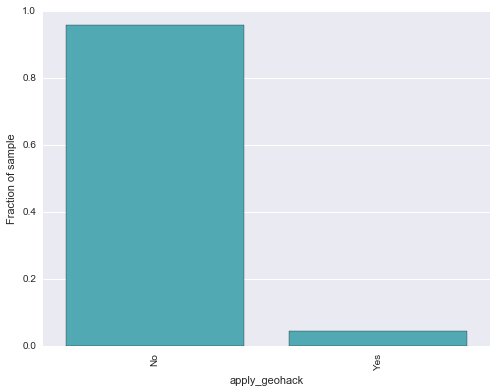

In [23]:
make_plot(fixed_categories[7])

### Will you be likely to need financial support from us to attend Geo Hackweek?

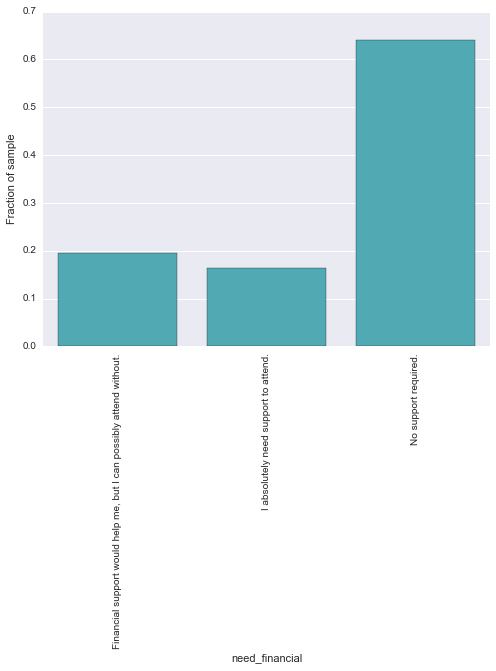

In [24]:
make_plot(fixed_categories[8])

### In terms of gender identity, do you consider yourself a minority with respect to the field of geospatial science?

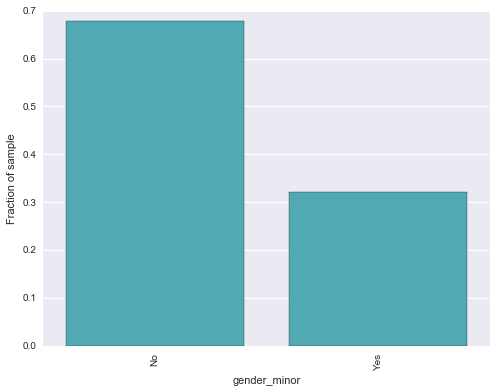

In [25]:
make_plot(fixed_categories[9])

### In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?

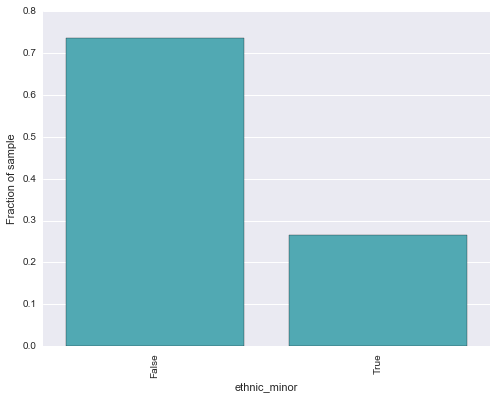

In [26]:
make_plot(fixed_categories[10])

In [27]:
weights = {
           'exp_geospatial': 1.0, 
           'exp_prog': 1.0,
           'gender_minor': 1.0,
           'ethnic_minor': 1.0,
           'exp_cmd': 1.0
          }

datatypes = {
            'exp_geospatial': 'categorical',
             'exp_prog': 'categorical',
             'gender_minor': 'categorical',
             'ethnic_minor': 'categorical',
             'exp_cmd': 'categorical'
             }

In [28]:
df['ethnic_minor'].unique()

array(['False', nan, 'True'], dtype=object)

In [29]:
exp_geo_mapper = entrofy.mappers.ObjectMapper(df["exp_geospatial"])
exp_geo_mapper.targets["I have extensive experience with geospatial data"] = 0.70
exp_geo_mapper.targets["I have some experience with geospatial data"] = 0.30

exp_prog_mapper = entrofy.mappers.ObjectMapper(df["exp_prog"])
exp_prog_mapper.targets["Program a little for coursework or research"] = 0.25
exp_prog_mapper.targets["Program heavily for my own research"] = 0.45
exp_prog_mapper.targets["Release code for others to use"] = 0.30

gender_minor_mapper = entrofy.mappers.ObjectMapper(df["gender_minor"])
gender_minor_mapper.targets["Yes"] = 0.65
gender_minor_mapper.targets["No"] = 0.35

ethnic_minor_mapper = entrofy.mappers.ObjectMapper(df["ethnic_minor"])
ethnic_minor_mapper.targets["True"] = 0.65
ethnic_minor_mapper.targets["False"] = 0.35

exp_cmd_mapper = entrofy.mappers.ObjectMapper(df["exp_cmd"])
exp_cmd_mapper.targets["I commonly use a command line in my work"] = 0.65
exp_cmd_mapper.targets["I occasionally use a command line in my work"] = 0.35

In [30]:
mappers = {
           "exp_geospatial": exp_geo_mapper, 
           "exp_prog": exp_prog_mapper, 
           "gender_minor": gender_minor_mapper,
           "ethnic_minor": ethnic_minor_mapper,
           "exp_cmd": exp_cmd_mapper
           }

In [31]:
df.columns

Index(['specific_project', 'specific_topics', 'specific_datasets', 'email',
       'exp_geospatial', 'exp_cmd', 'first_name', 'apply_geohack',
       'apply_hack', 'gender_minor', 'ethnic_minor', 'org_institute',
       'teach_topic', 'last_name', 'exp_prog', 'reason_attend', 'timestamp',
       'person_url', 'location', 'position', 'science_work', 'need_financial'],
      dtype='object')

In [32]:
mappers

{'ethnic_minor': <entrofy.mappers.ObjectMapper at 0x1bb3fc967f0>,
 'exp_cmd': <entrofy.mappers.ObjectMapper at 0x1bb3eb18828>,
 'exp_geospatial': <entrofy.mappers.ObjectMapper at 0x1bb3fc969b0>,
 'exp_prog': <entrofy.mappers.ObjectMapper at 0x1bb3fc96860>,
 'gender_minor': <entrofy.mappers.ObjectMapper at 0x1bb3fc96fd0>}

In [33]:
weights

{'ethnic_minor': 1.0,
 'exp_cmd': 1.0,
 'exp_geospatial': 1.0,
 'exp_prog': 1.0,
 'gender_minor': 1.0}

In [34]:
idx, max_score = entrofy.core.entrofy(df, 60,
                                      mappers=mappers,
                                      weights=weights,
                                      seed=seed)
print(max_score)

51.9821816258


In [35]:
df.columns

Index(['specific_project', 'specific_topics', 'specific_datasets', 'email',
       'exp_geospatial', 'exp_cmd', 'first_name', 'apply_geohack',
       'apply_hack', 'gender_minor', 'ethnic_minor', 'org_institute',
       'teach_topic', 'last_name', 'exp_prog', 'reason_attend', 'timestamp',
       'person_url', 'location', 'position', 'science_work', 'need_financial'],
      dtype='object')

,specific_project,specific_topics,specific_datasets,email,exp_geospatial,exp_cmd,first_name,apply_geohack,apply_hack,gender_minor,...,teach_topic,last_name,exp_prog,reason_attend,timestamp,person_url,location,position,science_work,need_financial
0,use Sentinel-2 to visualize algal blooms. I w...,I'd really like to learn a bit about user inte...,I most often use Landsat and Sentinel 2 datasets.,sara.lubkin@gmail.com,I have extensive experience with geospatial data,I occasionally use a command line in my work,Sara,No,No,Yes,...,I use Sentinel-2 to visualize algal blooms. I'...,Lubkin,Program a little for coursework or research,I'm transitioning from a career in paleontolog...,5/14/2017 12:38:18,https://saralubkin.com/,North America,Graduate/postgraduate student,water resources,I absolutely need support to attend.
1,Spatial stream network models and associated d...,"Python coding, batch scripting, automated data...",NaN,dfrench@uw.edu,I have extensive experience with geospatial data,I occasionally use a command line in my work,David,No,No,No,...,NaN,French,Program a little for coursework or research,Learn and collaborate with the geospatial comm...,5/14/2017 14:16:53,NaN,North America,Graduate/postgraduate student,water resources,No support required.
2,NaN,Modeling for surface process and natural event...,"LiDAR, IfSAR",habibah0602@gmail.com,I have extensive experience with geospatial data,I occasionally use a command line in my work,Habibah,No,No,Yes,...,Image interpretation,Mat,Program a little for coursework or research,To gain and share knowledge,5/15/2017 0:18:39,NaN,Asia,Graduate/postgraduate student,earth surface processes,I absolutely need support to attend.
4,"Likely will in the fall, nothing right now.",Machine Learning for Image/Grided Data Classif...,Not at the moment,mddunbar@uw.edu,I have extensive experience with geospatial data,I commonly use a command line in my work,Matt,No,Yes,No,...,No,Dunbar,Program a little for coursework or research,"Further methodolgical/technical knowledge, net...",5/15/2017 14:37:15,https://csde.washington.edu/,North America,Research Staff,Spatial Social Science,No support required.
7,measuring cascading effects of climate change ...,use of optical remote sensing data to measure ...,NaN,koppes@geog.ubc.ca,I have some experience with geospatial data,I occasionally use a command line in my work,Michele,No,No,Yes,...,Quantifying landscape change as a function of ...,Koppes,Program a little for coursework or research,amplify the types of geospatial platforms my s...,5/22/2017 9:54:40,www.climateandcryospherelab.com,North America,Teaching Faculty,earth surface processes,No support required.
9,NaN,New Python methods,NaN,holschuh@uw.edu,I have extensive experience with geospatial data,I commonly use a command line in my work,Nick,No,No,No,...,NaN,Holschuh,Program heavily for my own research,I want to build up my non-Matlab programming s...,5/22/2017 10:28:51,NaN,North America,Postdoc,Glaciology (cryosphere),No support required.
10,transient data that we would like to incorpora...,ubiquitous sensing in urban environments,maybe some Strava data,caspian@cs.washington.edu,I have some experience with geospatial data,I commonly use a command line in my work,Anat,No,Yes,Yes,...,I'd love to share our work with OpenSidewalks,Caspi,Program heavily for my own research,The belief that rich GIS data & its analytics ...,5/22/2017 11:48:49,tcat.cs.washington.edu,North America,Research Staff,disability and access technologies,No support required.
13,NaN,"Python for time-series analysis, Google Earth ...",Potentially yes.,pkpanday@nichols.edu,I have some experience with geospatial data,I occasionally use a command line in my work,Prajjwal,No,No,Yes,...,I have used R for my research. I could probabl...,Panday,Program heavily for my own research,I missed last year's Geo Hackweek. I was follo...,5/22/2017 12:22:30,https://www.researchgate.net/profile/Prajjwal_...,North America,Teaching Faculty,water resources,I ab

In [240]:
df[['first_name','last_name']].loc[idx].to_csv('accepted.csv')

In [248]:
df.loc[set(df.index) - set(idx)].to_csv('rejected.csv')